In [ ]:
!pip install seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from api_tester import read_file
import seaborn as sns
%matplotlib inline

First we retrieve the data gathered from the Idealista API stored in a JSON file

In [2]:
filename = 'api_out.json'

arr = read_file(filename)['elementList']
nd = pd.DataFrame(arr)
nd.size
#nd.head(5)

1950

In [3]:
nd.head()

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,rooms,...,hasPlan,has3DTour,has360,hasStaging,topNewDevelopment,topPlus,superTopHighlight,parkingSpace,labels,highlight
0,33065929,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,LOU-EMP-211966,27,6,327500.0,flat,sale,105.0,3,...,True,False,False,False,False,False,False,NaN,NaN,NaN
1,33065960,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,ATL3474,27,2,377500.0,flat,sale,102.0,2,...,False,False,False,False,False,False,False,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
2,33065945,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,208-2023,53,1,237500.0,flat,sale,113.0,2,...,False,False,False,False,False,False,False,NaN,NaN,NaN
3,33065897,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,58637,64,NaN,940000.0,chalet,sale,763.0,4,...,True,False,False,False,False,False,False,NaN,NaN,NaN
4,33065878,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,NaN,31,NaN,760000.0,chalet,sale,221.0,4,...,True,True,False,False,False,False,False,NaN,NaN,NaN


Now let's visualize the data we've just fetched to get a better idea of the geographical disposal of the real estate for this study

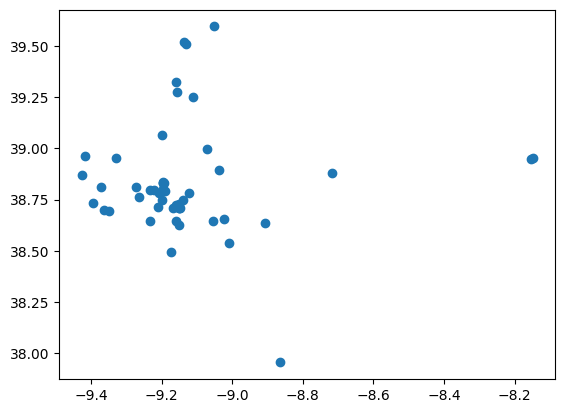

In [4]:
plt.scatter(nd.longitude, nd.latitude)

Text(0.5, 1.0, 'Distribution of houses - Lisbon Metro Area')

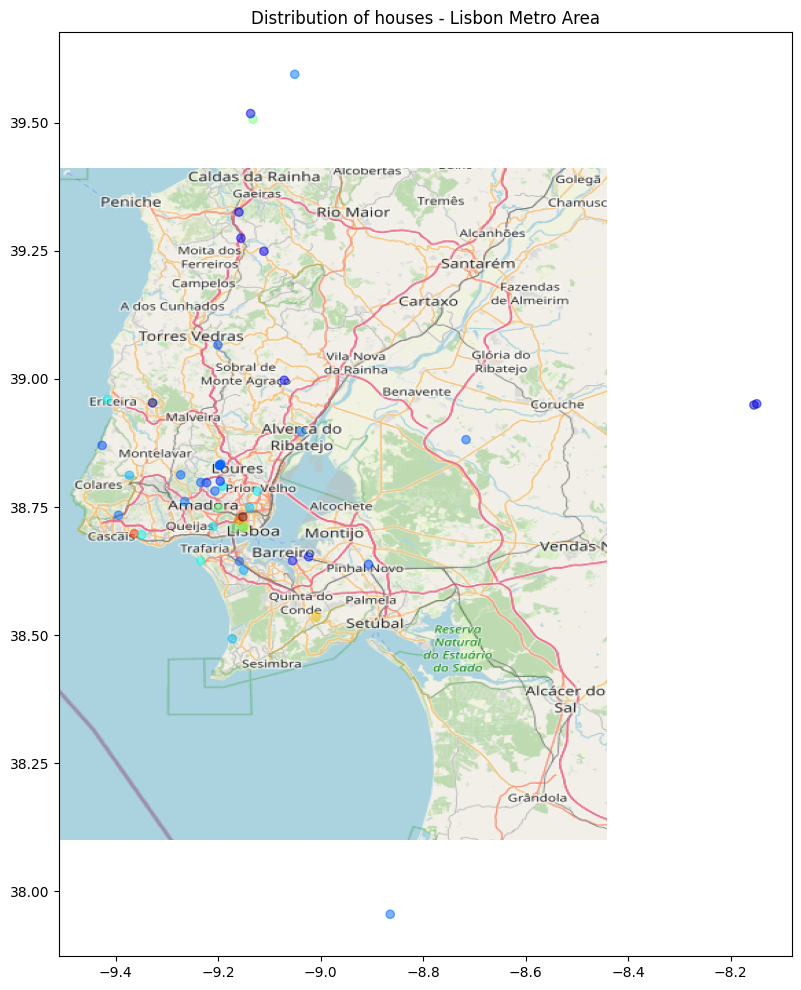

In [5]:
plt.figure(figsize=(12,12))
img = plt.imread('lisbon.png')
plt.imshow(img, zorder=0, extent=[-9.51, -8.442, 38.10, 39.41, ])

plt.scatter(x=nd.longitude, y=nd.latitude, alpha=0.5,
             c=nd['priceByArea'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')

plt.title('Distribution of houses - Lisbon Metro Area')

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

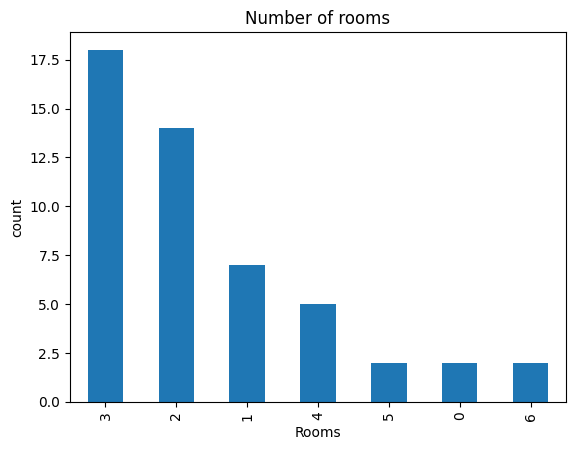

In [6]:
nd['rooms'].value_counts().plot(kind='bar')
plt.title('Number of rooms')
plt.xlabel('Rooms')
plt.ylabel('count')
sns.despine

In [7]:
nd = pd.get_dummies(data=nd, columns=['status','country','propertyType'])

<Figure size 1000x1000 with 0 Axes>

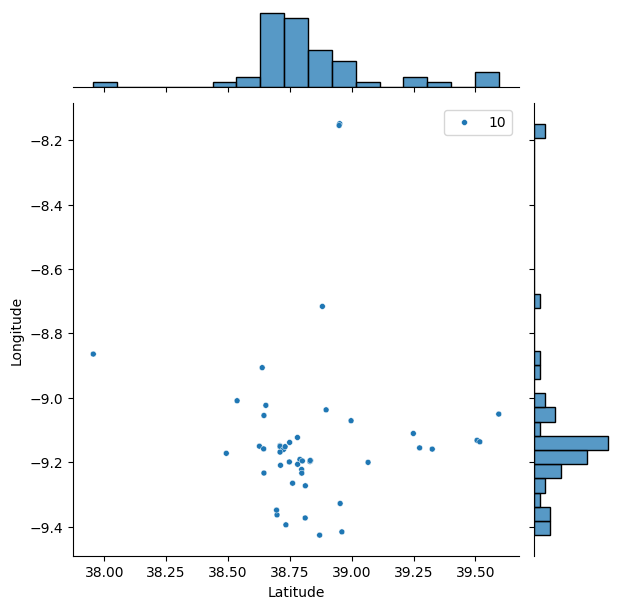

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [8]:
plt.figure(figsize=(10,10))
sns.jointplot(x=nd.latitude.values, y=nd.longitude.values, size=10)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Longitude', fontsize=10)
plt.show()
sns.despine

Text(0.5, 1.0, 'Price vs Size')

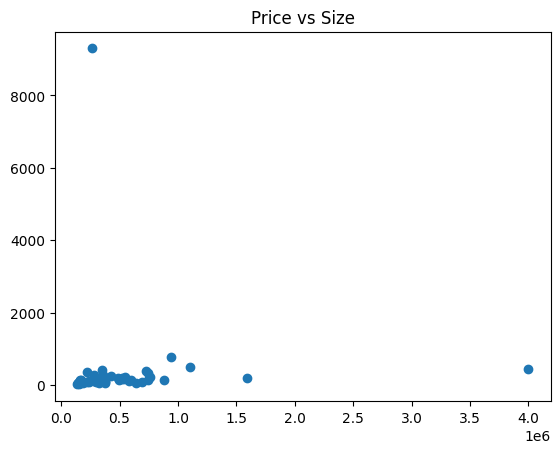

In [9]:
plt.scatter(nd.price,nd['size'])
plt.title('Price vs Size')

Text(0.5, 1.0, 'Price v Longitude')

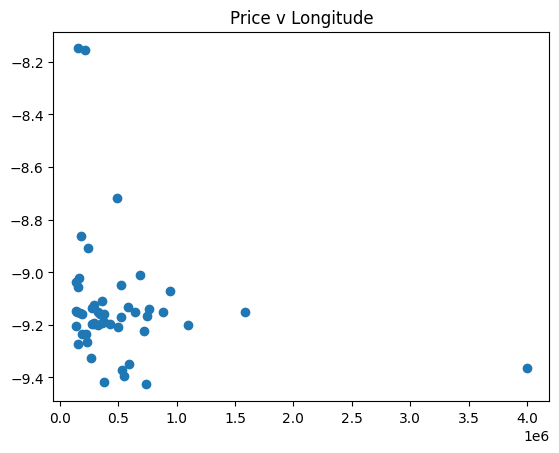

In [10]:
plt.scatter(nd['price'], nd.longitude)
plt.title('Price v Longitude')

Text(0.5, 1.0, 'Price v Latitude')

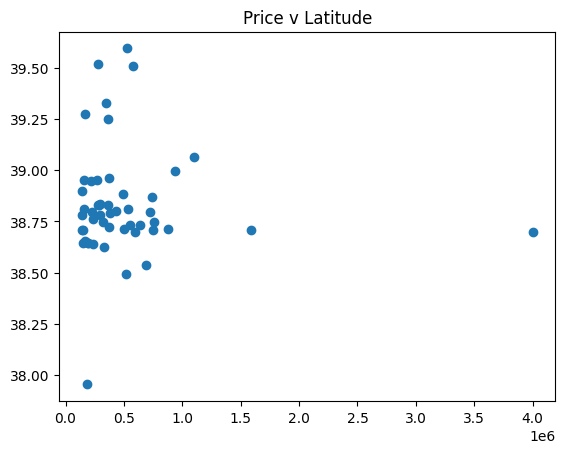

In [11]:
plt.scatter(nd.price, nd.latitude)
plt.title('Price v Latitude')

<AxesSubplot: >

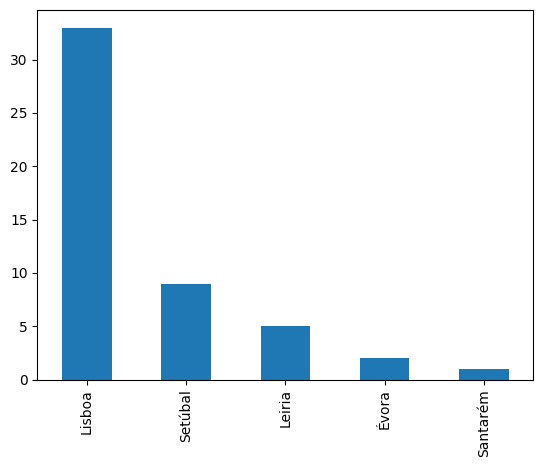

In [18]:
nd.province.value_counts().plot(kind='bar')


Text(0.5, 1.0, 'Province v Price')

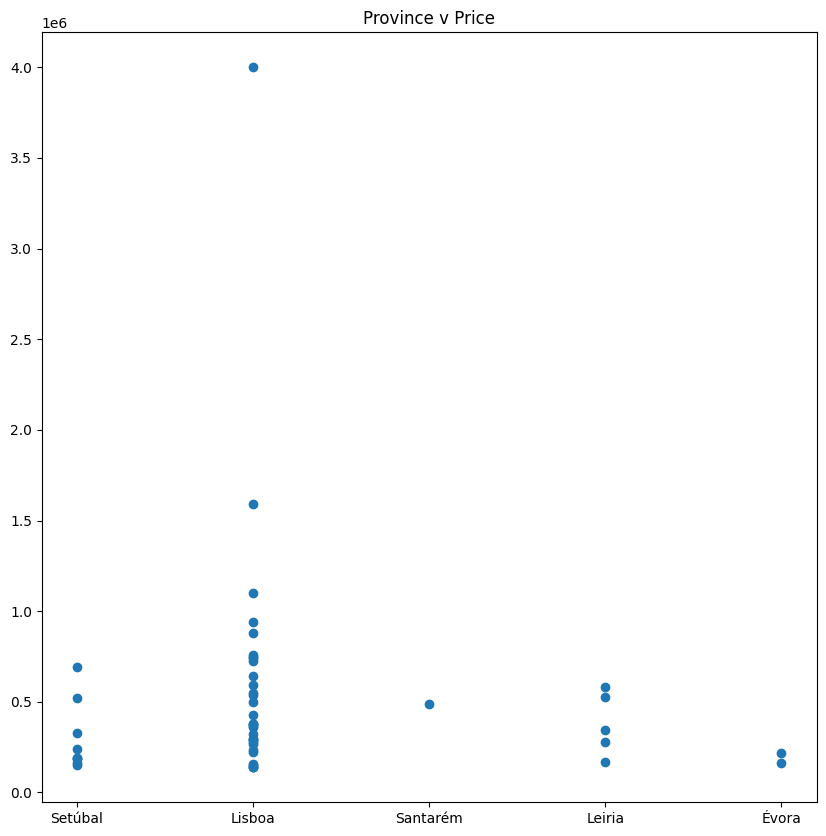

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(nd.price, nd.province)
plt.title('Price v Province')

Text(0.5, 1.0, 'Price v Municipality')

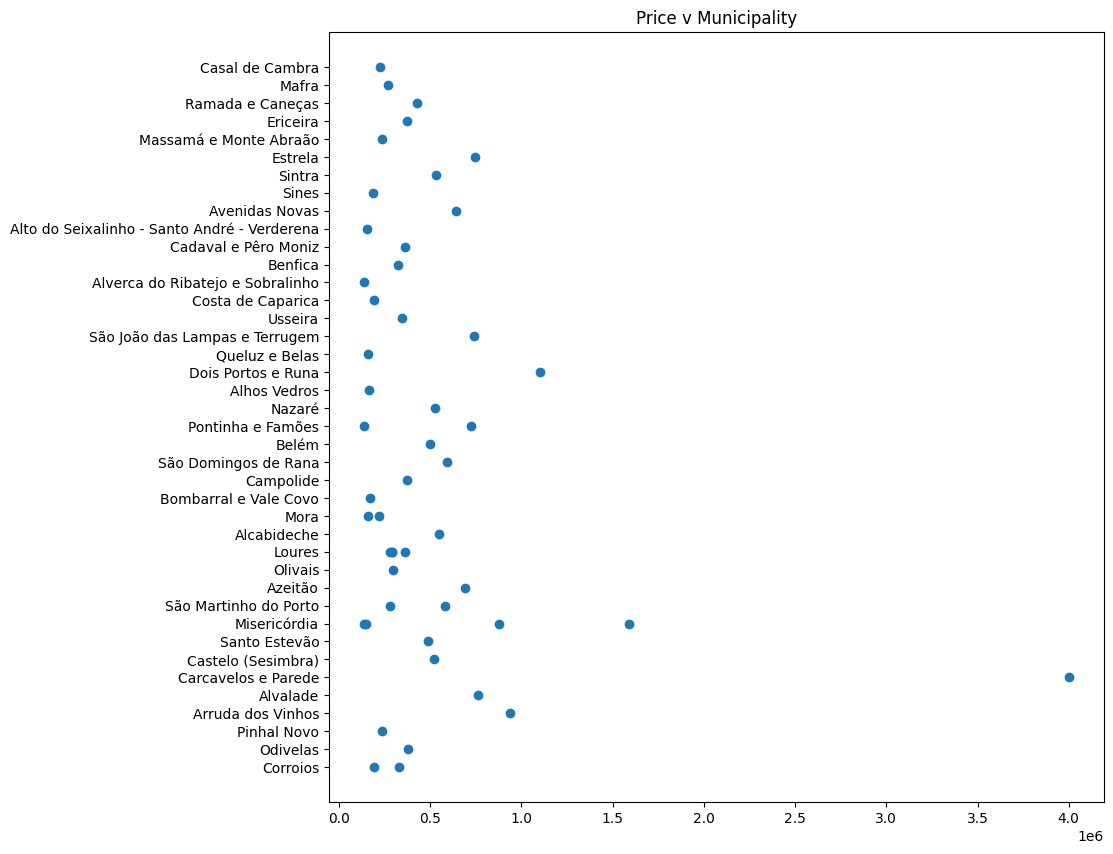

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(nd.price, nd.municipality)
plt.title('Price v Municipality')

Text(0.5, 1.0, 'Price v Bathrooms')

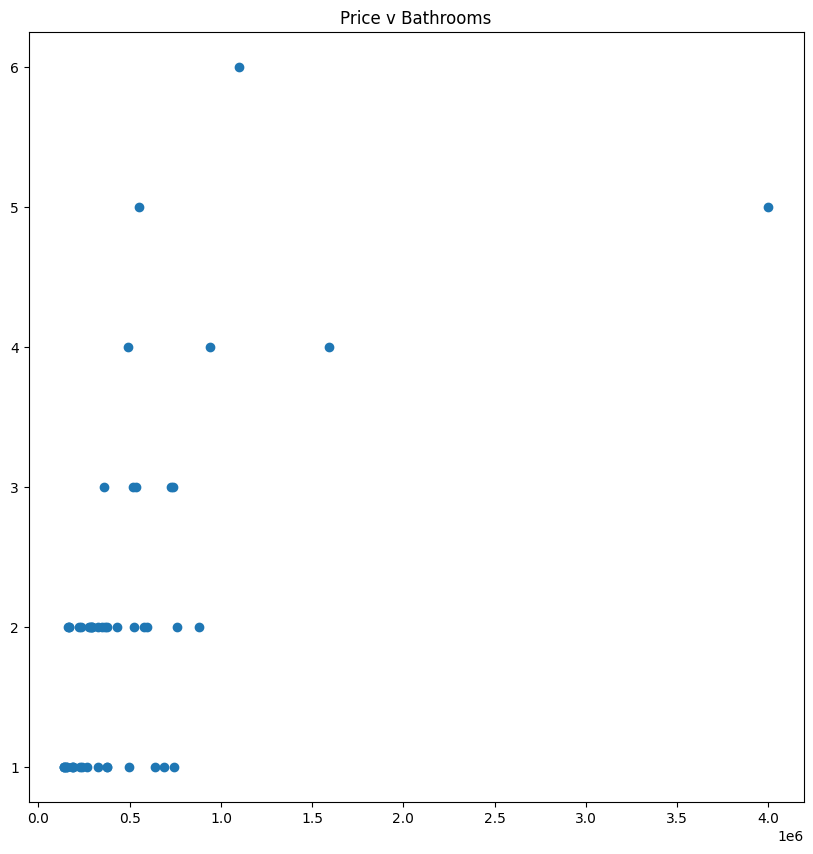

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(nd.price, nd.bathrooms)
plt.title('Price v Bathrooms')

In [22]:
nd = nd.replace({True:1,False:0})
nd.head()

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,operation,size,rooms,bathrooms,...,parkingSpace,labels,highlight,status_good,status_renew,country_pt,propertyType_chalet,propertyType_flat,propertyType_penthouse,propertyType_studio
0,33065929,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,LOU-EMP-211966,27,6,327500.0,sale,105.0,3,2,...,NaN,NaN,NaN,1,0,1,0,1,0,0
1,33065960,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,ATL3474,27,2,377500.0,sale,102.0,2,2,...,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN,1,0,1,0,1,0,0
2,33065945,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,208-2023,53,1,237500.0,sale,113.0,2,1,...,NaN,NaN,NaN,1,0,1,0,1,0,0
3,33065897,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,58637,64,NaN,940000.0,sale,763.0,4,4,...,NaN,NaN,NaN,1,0,1,1,0,0,0
4,33065878,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,NaN,31,NaN,760000.0,sale,221.0,4,2,...,NaN,NaN,NaN,0,1,1,1,0,0,0


In [23]:
x = nd.drop(columns=['municipality','district','highlight','labels','hasPlan','priceByArea','operation','parkingSpace','propertyCode','suggestedTexts','detailedType','description','url','showAddress','hasVideo','latitude','longitude','externalReference', 'numPhotos','thumbnail', 'address', 'has3DTour', 'has360', 'hasStaging', 'superTopHighlight', 'topNewDevelopment', 'topPlus'])
x.head()

KeyError: "['neighborhood'] not found in axis"

: 

In [28]:
floor_values_to_replace = x.query("floor >= 'A' ")['floor']
selected_rows = x['floor'].isin(floor_values_to_replace)
x.loc[selected_rows, 'floor'] = 0

x.head()

,price,size,rooms,bathrooms,province,distance,newDevelopment,floor,hasLift,status_good,status_renew,country_pt,propertyType_chalet,propertyType_flat
0,75000.0,76.0,2,1,Lisboa,46954,0,NaN,NaN,1,0,1,1,0
1,550000.0,350.0,3,3,Setúbal,15337,0,NaN,NaN,1,0,1,1,0
2,178000.0,111.0,2,1,Leiria,73506,0,1,1.0,1,0,1,0,1
3,82500.0,40.0,1,1,Setúbal,79076,0,NaN,NaN,1,0,1,1,0
4,225000.0,76.0,1,1,Lisboa,4298,0,NaN,1.0,1,0,1,0,1


In [30]:
x.fillna(0, inplace=True)
x.head()

,price,size,rooms,bathrooms,province,distance,newDevelopment,floor,hasLift,status_good,status_renew,country_pt,propertyType_chalet,propertyType_flat
0,75000.0,76.0,2,1,Lisboa,46954,0,0,0.0,1,0,1,1,0
1,550000.0,350.0,3,3,Setúbal,15337,0,0,0.0,1,0,1,1,0
2,178000.0,111.0,2,1,Leiria,73506,0,1,1.0,1,0,1,0,1
3,82500.0,40.0,1,1,Setúbal,79076,0,0,0.0,1,0,1,1,0
4,225000.0,76.0,1,1,Lisboa,4298,0,0,1.0,1,0,1,0,1


Let's create two separate sets, one specific for Lisbon, and the other with all the other provinces we can find

In [31]:
x_lisbon = x.loc[x['province'] == 'Lisboa']
x_lisbon = x_lisbon.drop(columns=['province'])

x = pd.get_dummies(data=x, columns=['province'])

Now let's separate the labels we which to predict in both datasets, the price

In [32]:
y = x['price']
x = x.drop(columns=['price'])

y_lisbon = x_lisbon['price']
x_lisbon = x_lisbon.drop(columns=['price'])


In [33]:
print('x shape:',x.shape,' y shape:',y.shape)
print('x lisbon shape:',x_lisbon.shape,' y lisbon shape:',y_lisbon.shape)

x shape: (50, 16)  y shape: (50,)
x lisbon shape: (29, 12)  y lisbon shape: (29,)


In [34]:
nd.describe()

,numPhotos,price,size,rooms,bathrooms,latitude,longitude,showAddress,hasVideo,newDevelopment,...,hasStaging,superTopHighlight,topNewDevelopment,topPlus,hasLift,status_good,status_renew,country_pt,propertyType_chalet,propertyType_flat
count,50.000000,5.000000e+01,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,...,50.0,50.0,50.0,50.0,25.00000,50.000000,50.000000,50.0,50.000000,50.000000
mean,24.020000,4.569900e+05,162.698000,2.84000,2.100000,38.731782,-9.106168,0.160000,0.220000,0.0,...,0.0,0.0,0.0,0.0,0.76000,0.980000,0.020000,1.0,0.360000,0.640000
std,14.045829,4.154064e+05,134.041563,1.26749,1.328648,0.205481,0.162889,0.370328,0.418452,0.0,...,0.0,0.0,0.0,0.0,0.43589,0.141421,0.141421,0.0,0.484873,0.484873
min,2.000000,7.500000e+04,40.000000,1.00000,1.000000,38.173804,-9.396793,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,1.0,0.000000,0.000000
25%,17.000000,2.275000e+05,85.000000,2.00000,1.000000,38.573673,-9.176269,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.00000,1.000000,0.000000,1.0,0.000000,0.000000
50%,22.000000,3.120000e+05,108.400000,3.00000,2.000000,38.719299,-9.132946,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.00000,1.000000,0.000000,1.0,0.000000,1.000000
75%,28.750000,5.450000e+05,188.250000,3.75000,3.000000,38.773502,-9.037584,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.00000,1.000000,0.000000,1.0,1.000000,1.000000
max,72.000000,2.200000e+06,701.000000,7.00000,6.000000,39.357557,-8.560945,1.000000,1.000000,0.0,...,0.0,0.0,0.0,0.0,1.00000,1.000000,1.000000,1.0,1.000000,1.000000


Set training data for both datasets

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=2)
x_l_train, x_l_test, y_l_train, y_l_test = train_test_split(x_lisbon, y_lisbon, test_size=0.10, random_state=2)

In [36]:
linear = LinearRegression()
linear.fit(x_train, y_train)
predictions = linear.predict(x_test)

In [37]:
linear.score(x_test, y_test)

0.5827669419525271

In [38]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=5, min_samples_split=2,
                                         learning_rate=0.1, loss='squared_error')

In [39]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5)

In [40]:
clf.score(x_test, y_test)

0.5324075002410975